## test notebook for testing the wavelet position encoding

In [1]:
# set working directory to root
import os
os.chdir('..')
os.getcwd()

'/Users/tonpoppe/workspace/GraphCase'

In [2]:
import networkx as nx
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from GAE.graph_case_controller import GraphAutoEncoder
from GAE.graph_reconstructor import GraphReconstructor
from GAE.input_layer_constructor import InputLayerConstructor
from GAE.position_manager import WaveLetPositionManager
from  GAE.graph_case_tools import Tools
import examples.example_graph_bell_version2 as gb
import math

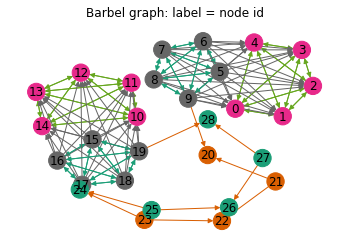

In [3]:
import networkx as nx
G =  nx.read_gpickle("/Users/tonpoppe/Downloads/graph.pickle")

plt.subplot(111)
# # pos = nx.spring_layout(G)
pos = nx.kamada_kawai_layout(G)
color = [G.out_degree(x) for x in range(G.number_of_nodes())]
edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
options = {
'node_color': color,
'node_size': 300,
'edgelist':edges,
'edge_color':weights,
'width': 1,
'with_labels': True,
'pos': pos,
'edge_cmap': plt.cm.Dark2,
'cmap': plt.cm.Dark2
}
nx.draw(G, **options)
plt.title("Barbel graph: label = node id")
plt.show()

In [4]:
gae = GraphAutoEncoder(
    G, support_size=[4, 4], dims=[3, 16, 16, 16], batch_size=3, hub0_feature_with_neighb_dim=None,
    useBN=True, verbose=True, seed=1, learning_rate=0.002, act=tf.nn.relu, encoder_labels=['attr1', 'attr2']
)

The following node labels are excluded []
The following node labels are included ['attr1', 'attr2']
The following edge labels are excluded []
The following edge labels are included ['weight']
train nodes [24, 9, 20, 17, 13, 0, 19, 25, 6, 12] ...
val nodes [27, 16, 11, 10, 22, 1, 5, 28, 7] ...


2023-04-14 15:34:24.344233: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Cause: mangled names are not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [5]:
pm = WaveLetPositionManager(G, 2)


start creating position dict at 1681479265.7484102
pos dictionary created in 0.8107819557189941 second: 1681479266.5591922


In [6]:
import pygsp as gsp
id = 9
nodes = [n for n in pm.single_pos_dict.keys() if (n>id*100-1 and n<(id+1)*100)]
coef = []
for n in nodes:
    if n!= id*100+29:
        coef.append(pm.single_pos_dict[n])
    
G_ego = nx.ego_graph(G.to_undirected(), id, radius=2)
adj = nx.adjacency_matrix(G_ego)
G_gsp = gsp.graphs.Graph(adj)
# G_gsp.set_coordinates(kind='spring')
# G_gsp.plot_signal(np.array(coef)[:,0], colorbar=False)

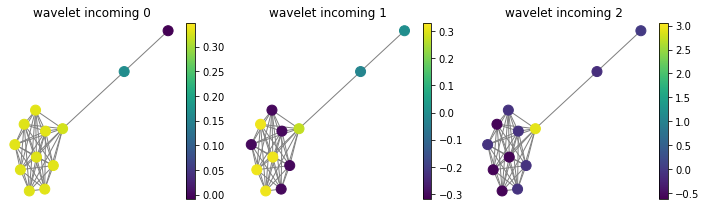

In [7]:
fig = plt.figure(figsize=(10, 3))
G_gsp.set_coordinates(kind='spring')
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1)
    G_gsp.plot_signal(np.array(coef)[:,i], colorbar=True, ax=ax)
    title = f'wavelet incoming {i}'
    ax.set_title(title)
    ax.set_axis_off()
fig.tight_layout()

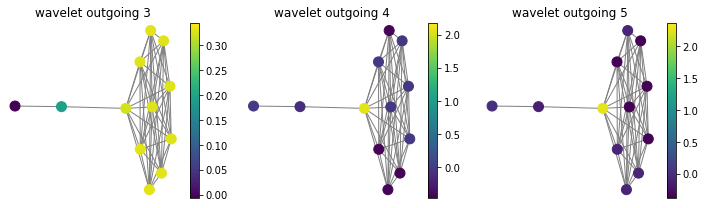

In [8]:
fig = plt.figure(figsize=(10, 3))
G_gsp.set_coordinates(kind='spring')
for i in range(3,6):
    ax = fig.add_subplot(1, 3, i-2)
    G_gsp.plot_signal(np.array(coef)[:,i], colorbar=True, ax=ax)
    title = f'wavelet outgoing {i}'
    ax.set_title(title)
    ax.set_axis_off()
fig.tight_layout()

## test waveletposition manager

In [9]:
gae2 = GraphAutoEncoder(
    G, support_size=[4, 4], dims=[3, 16, 16, 16], batch_size=3, hub0_feature_with_neighb_dim=None,
    useBN=True, verbose=True, seed=1, learning_rate=0.002, act=tf.nn.relu, encoder_labels=['attr1', 'attr2'],
    pos_enc_cls=WaveLetPositionManager
)

The following node labels are excluded []
The following node labels are included ['attr1', 'attr2']
The following edge labels are excluded []
The following edge labels are included ['weight']
start creating position dict at 1681479268.14136
pos dictionary created in 0.6566810607910156 second: 1681479268.798041
train nodes [24, 9, 20, 17, 13, 0, 19, 25, 6, 12] ...
val nodes [27, 16, 11, 10, 22, 1, 5, 28, 7] ...
